In [1]:
print('Lecture-8')

Lecture-8


### Sıralı (Ordinal) Verilerin Sayısal Biçime Dönüştürülmesi

replace, map, applymap, apply metotlarıya gerçekleştirilebilir. 

Cinsiyet,Kilo,Boy,Eğitim
Erkek,85,172,İlkokul
Kadın,72,170,Üniversite
Kadın,65,162,Lise
Erkek,92,183,Lise
Kadın,62,173,İlkokul
Erkek,98,172,Ortaokul

Eğitim sütunu sıralı ölçeğe ilişkindir.

In [2]:
import pandas as pd

df = pd.read_csv('test.csv', usecols=[1,2,3])
print(df)

   Kilo  Boy      Eğitim
0    85  172     İlkokul
1    72  170  Üniversite
2    65  162        Lise
3    92  183        Lise
4    62  173     İlkokul
5    98  172    Ortaokul


In [3]:
replace_dict = {'Eğitim': {'İlkokul': 0, 'Ortaokul': 1, 'Lise': 2, 'Üniversite': 3}}
df.replace(replace_dict, inplace=True)
print(df)

   Kilo  Boy  Eğitim
0    85  172       0
1    72  170       3
2    65  162       2
3    92  183       2
4    62  173       0
5    98  172       1


In [4]:
dataset = df.to_numpy()
print(dataset)

[[ 85 172   0]
 [ 72 170   3]
 [ 65 162   2]
 [ 92 183   2]
 [ 62 173   0]
 [ 98 172   1]]


In [5]:
replace_dict = {'İlkokul': 0, 'Ortaokul': 1, 'Lise': 2, 'Üniversite': 3}
df['Eğitim'] = df['Eğitim'].replace(replace_dict)

In [6]:
df

,Kilo,Boy,Eğitim
0,85,172,0
1,72,170,3
2,65,162,2
3,92,183,2
4,62,173,0
5,98,172,1


### YAPAY SİNİR AĞLARI

Deep Learning, sinir bilim. frank rosenblatt --> perceptron 

Yapay sinir ağları pek çok farklı alanda uygulaması vardır.

- metinlerin sınıflandırılması ve kategorize edilmesi (text classification and categorization)
- ses tanıma (speech recognition)
- karakter tanıma
- metin üretimi
- makine çevirisi
- örüntü tanıma
- yüz tanıma

Yapay Nöron Modeli
----------------------------

nöron --> giriş (dentrid), çıkış (akson) --> bunlar matematiksel nöron modelinde de norona çeşitli girişle ve çıkış söz konusu olduğunda bu yapı kullanılıyor. 

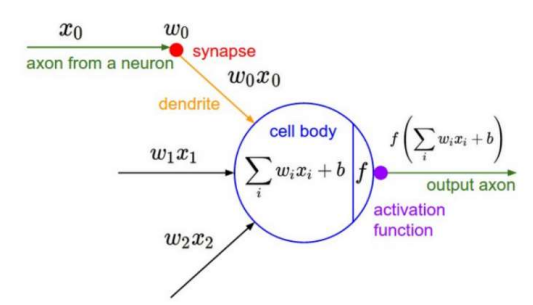
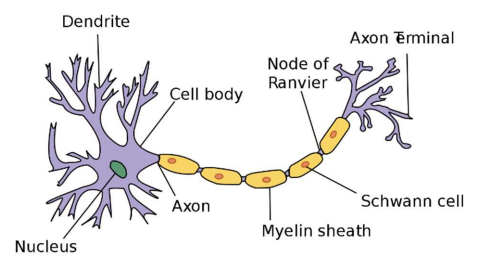

bu örnek nöron modelinde x'ler (x0, x1, x2) gözlenen birtakım değişkenleri temsil etmekdir. başka bir deyişle x'ler tipik bi ristatistik veir tablosundaki sütunlar temsil etmektedir.

bu girdi değişkenlerinin birtakım w katsayılarıyla çarpılıp toplandığını görüyoruz. sonra da bu toplam bir fonksiyona sokulup bir çıktı değeri elde edilmektedir. w değerleri? aslında eğitimli ağlarda nihai olarak elde edilip bir daha değiştirilmeyecek ağırlık değerleridir. zaten yapay sinir ağının eiğitilmesi aslında girdilere uygun çıktıyı verebilecek w ağırlık değerlerinni tespit edilmesi sürecidir. Giriş ile çıkış arasında en uygun ilişkiyi w katsayılarının uygun biçimde belirlenmesiyle kurulmaktadır. 

Biz burada tek nöron üzeirnde açıklama yaptık. halbuki insanın sinir sisteminde odluğu gibi yapay  sinir ağlarında pek çok nöronun çıktıları başka nöronların girdilerine bağlanabilmektedir. 

In [8]:
# yapay bir nöron basit bir sınıfla temsil edilebilir.

import numpy as np

class Neuron:
    def __init__(self, weights, activation, bias = 0):
        self.weights = weights
        self.activation = activation
        self.bias = bias
    
    def output(self, x):
        total = np.dot(self.weights, x)
        return self.activation(total + self.bias)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

n = Neuron([0.2, 0.3, 0.4], sigmoid)
result = n.output([2, 1, 7])
print(result)

0.9706877692486436


## Yapay Sinir Ağlarında Katmanlar

1) Girdi Katmanı (Input Layer / Visible Layer)
2) Saklı Katman (Hidden Layer)
3) Çıkış Katman (Output Layer)

bir yapay sinir ağında katmanlar ve katmanlardaki nöronların oluşturduğu yapıya "ağ mimarisi" denilmektedir.

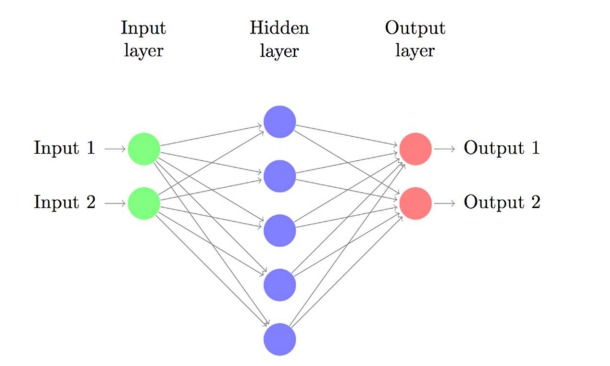

Saklı katmanlardaki nöron sayıları girdi katmanındaki nöron sayısı ile aynı olmak zorunda değildir. Genellikle eğer girdi katmanındaki nöronların sayıları göreli olarak azsa saklı katmanlardaki nöronların sayıları fazlalaştırlıyor. Eğer girdi katmanında göreli olarak çok fazla nöron varsa saklı katmanlardaki nöronların sayıları işilem yüklerini azaltmak için düşürülebilmektedir. Genel olarak saklı katmanların sayısı ikiden büyükse bu tür yapay sinir ağlarına `Derin Öğrenme (deep Learning)` ağları denilmektedir. 

Çıktı katmanı sinir ağından elde edilecek bilgiyi dış dünyaya veren katmandır. Çıktı katmanının kaç nörondan oluşaacağı çıktı olarak ne elde edileceği ile ilgidir. 

- Girdi katmanında kaç nöron bulunmalıdır?
- Çıktı katmanında kaç nöron bulunmalıdır?
- Ara katmanların sayısı ne olmalıdır?
- Ara katmanlarda kaç nöron bulunmalıdır?

Girdi Katmanı: features sayısı kadar (yani veri kümesindeki sütun sayısı kadar). 
Çıktı Katmanı: kestirimden ne elde edileceği ile ilgilidir. örneğin ağımız var/yok gibi, olumlu/olumsuz, gibi hasta/sağlıklı ikili bir tahminlemede (ya da sınıflandırmada) bulunacaksa (bu tür modellere istatistikte lojistik regresyon modelleri denilmektedir) çıktı katmanı tek bir nörondan oluşur. 

Saklı Katman: 
- Eğer problem doğrusal olarak ayrıştırılabilir (linearly separable) ise ya da yalın bir regresyon problemiyse saklı katman kullanmaya gerek yoktur. 
- Bir saklı katman pek çok sorunun çözülmesi için yeterlidir. İki saklı katman çok büyük ölçüde pek çok problemin çözümü için yeterli olmaktadır. 
- İkiden fazla saklı katmanı olan derin modeller karmaşık problemlerin çözümü için kullanılmaktadır.

- Saklı katmandaki nöronların sayısı girdi katmanındaki nöronların sayısının 2/3 ile çıktı katmanındaki nöronların sayısının toplamı kadar toplamı kadar olabilir. Örneğin girdi katmanındaki nöron sayısı 5, çıktı katmanındaki 1 olsun. bu durumda saklı katmandaki nöron sayısı 5 olabilir.
- Saklı katmandaki nöronların sayısı girdi katmanındaki nöronların sayısınnı iki katından fazla olmamalıdır.

Fazla saklı katman ve saklı katmanlarda fazla nöron bulundurmak yanlış öğrenmelere (overfitting durumuna) yol açabilmektedir. Ağın öğrenmesi gereken şeyi değil başka birtakım şeyleri öğrenmesi durumuna "overfitting", ağın problem çözmede yetersiz kalması durumuna ise "underfitting" denilmektedir.

https://www.heatonresearch.com/2017/06/01/hidden-layers.html

## YSA, DÖ, Kullanılan Kütüphaneler

- Tensorflow Google tarafından geliştirilmiş bir makine öğrenmesi kütüphanesidir. ysa, dö
- PyTorch --> ysa, dö --> Facebook
- Theano --> nümerik analiz kütüphanesi. ysa, dö
- MxNet --> ysa, dö

scikit-learn --> ysa için tasarlanmamıştır.

- Keras: tensorflow kütüphanesine dahil edilmişltir.

pip install tensorflow --> conda

https://keras.io/

## Denetimli Sinir Ağlarında Veri Kümeleri

- Denetimli (supervised)
- Denetimsiz (Unsupervised)
- Pekiştirmeli (Reinforcement)

Denetimli sinir ağlarında ağın mimarisi oluşturulduktan sonra gerçek verilerle ağın eğitilmesi (training) gerekmektedir. bu eğitim sırasında nöronların w katsayıların ayarlanmaktadır. işte bu eğitim işleminde kullanılmak üzere elimizde gerçek örneklerin bulunması gerekir. Eğitimde kullanılan gerçek örneklem kümesine "eğitim veri kümesi (training dataset)" denilmektedir. Ağ eğitildikten sonra ağın test edilmesi için de gerçek verilerden oluşan bir veri kümesine gereksinim duyulmaktadır. Buna da "test veri kümesi (test dataset)" denilmektedir. O halde bizim gerçek verileri toplayıp bu verileri "eğitim veri kümesi" ve "test veri kümesi" olmak üzere ikiye ayırmamız gerekir. Eğitimde kullanılan veri kümesinin aynı zamanda test işleminde kullanılması yanlış bir tekniktir. Veri kümesini "eğitim ve test" olmak üzere ikiye ayırmadan önce "karıştırmak" iyi bir tekniktir. Çünkü veriler CSV dosyalarında ya da diğer kaynaklarda karşılık bir biçimde bulunmuyor olabilir.

Peki eğitim veri kümesi ve test veri kümesi arasındaki oran nasıl olmalıdır? Örneğin uygulamalarda tipik olarak verilerin %80'i eğitim vberi kümesi için %20'si ise test veri kümesi için ayrılabilmektedir. Ancak veri kümesi çok büyükse ya da çok küçükse test kümesinin oranı düşürülebilir.

Elde edilmiş veriler "eğitim veri kümesi" ve "test veri kümesi" biçiminde ikiye ayrıldıktan sonra ayrıca bunların da "girdi veri kümesi" ve "çıktı veri kümesi" biçiminde ayrıştırılması gerekir. örneğin bir banka müşterisinin 13 özelliğine bakılarak o müşterinin 3 ay içerisinde bankayı tesrk edip etmeyeceğinin kestirilmeye çalışıldığını düşünelim. işte bizim bu kestirimi yapabilmemiz için 13 özelliği olan müşterilerin bankayı 3 ay içerisinde terk edip etmediğine yönelik bir veri kümemizin olması gerkeir. bu veri kümesinde girdiler 13 özellikten, çıktı ise bankayı terk edip etmediğine ilişkin (0 yada 1) bir özellikten oluşmalıdır.

eğitim veri kümelerini: training_dataset
test veri kümelerini: test_dataset
girdi ve çıktı biçiminde: training_dataset_x, training_dataset_y, test_dataset_x, test_dataset_y 

pima-indians-diabetes: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) 